In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [12]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)



In [14]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


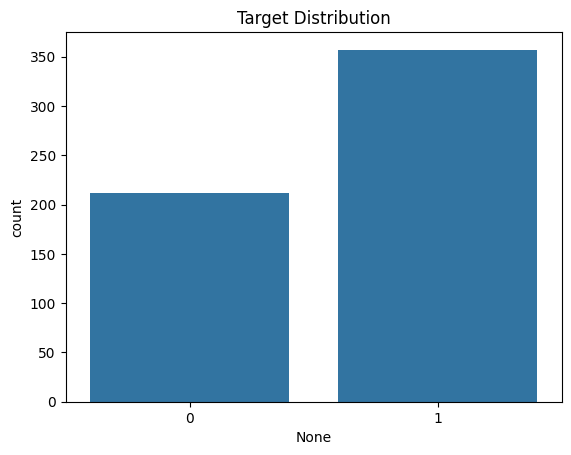

In [4]:
sns.countplot(x=y)
plt.title("Target Distribution")
plt.show()



In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [7]:
estimator = DecisionTreeClassifier(max_depth=3)
bag_model = BaggingClassifier(estimator=estimator, n_estimators=100, max_samples=0.8, max_features=0.8, bootstrap=True, random_state=42)



In [8]:
bag_model.fit(X_train, y_train)
y_pred = bag_model.predict(X_test)



In [9]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.956140350877193
Confusion Matrix:
 [[40  3]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [16]:
cv_scores = cross_val_score(bag_model, X_scaled, y, cv=10, scoring='accuracy')
print("Cross-validation Scores:", np.round(cv_scores, 4))
print("Mean CV Accuracy:", np.round(cv_scores.mean(), 4))




Cross-validation Scores: [0.9649 0.8947 0.9123 0.9474 0.9825 0.9825 0.9474 0.9825 0.9474 0.9821]
Mean CV Accuracy: 0.9544

 User Input ---


In [15]:
for i, est in enumerate(bag_model.estimators_[:3]):
    print(f"Estimator {i+1} trained on samples:")
    print(bag_model.estimators_samples_[i])


Estimator 1 trained on samples:
[ 59  95   3 150 363 302 116 194 361 437 433  77 184 336 242 241 213  64
 256 378  59 103 337  41 437 347  70 132 256  60 440 279 412  14 234 249
 183 203 379 301 340 165 100 173 213 367  23  70   1 337 172 294 353 367
 371  52 438   9 338 327 109  73 447 372 217 196  14 288 432 104 430 299
 104  45 452 433 357  53 261 370 398 146  36 408 303 279 340 240 352  39
 120 399 292   0 406 135 254 122 437 269 222 265  15 381 191 412 425 262
 333  48  27  70 447 384 316 404 173  49 131 268  85 184 303  99 318 425
 375 401   1  90 244 227 420 166 251  36  86 236 406  64  66 211  68 332
 313  87 221  93 110 414  79  65 208 313 199  75   5 198 200 358 270   1
 157  26  97 272 385 432 239 224 383 322 175 251 450 138 245  62 121 427
  11 373  24  74 292  23 103 286 292 320 140 410 375 242 169 113  37 215
 137 444 332 397 133 233   1 248  68  65 322 305  32 430 166 300  34 294
 245 399 157 433 271 100  89  18 102 229  65 411 113  41 110 108 223 236
 418 393 426 371  5